In [1]:
import pandas as pd
import csv

import numpy as np
import pickle

In [2]:
x = pd.read_csv('train_X_nb.csv',sep = '\t',header=None,names=['text'])
y = pd.read_csv('train_Y_nb.csv',sep = '\t',header= None,names=['labels'])

In [3]:
x

,text
0,"Subject: re : faculty lunch alison , i recom..."
1,Subject: request submitted : access request fo...
2,"Subject: re : vmi agreements hi vince , mark ..."
3,Subject: re : possible summer internship with ...
4,Subject: cheap oem soft shipping worldwide do...
...,...
4291,Subject: faculty contact and schedule persenta...
4292,Subject: capital book to further the process ...
4293,Subject: failure notice hi . this is the qmai...
4294,Subject: this free 7 - day trial will prove th...


In [4]:
y

,labels
0,0
1,0
2,0
3,0
4,1
...,...
4291,0
4292,0
4293,1
4294,1


In [5]:
y['labels'].value_counts(normalize = True)

0    0.761173
1    0.238827
Name: labels, dtype: float64

In [6]:
import matplotlib.pyplot as plt

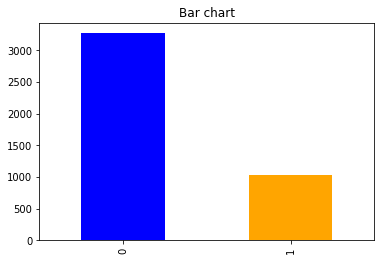

In [7]:
count_Class=pd.value_counts(y['labels'], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer
def process(text):
    # lowercase it
    text = text.lower()
    # remove punctuation
    text = ''.join([t for t in text if t not in string.punctuation])
    # remove stopwords
    text = [t for t in text.split() if t not in stopwords.words('english')]
    # stemming
    st = Stemmer()
    text = [st.stem(t) for t in text]
    # return token list
    return text

In [11]:
process('It\'s holiday and we are playing cricket. Jeff is playing very well!!!')

['holiday', 'play', 'cricket', 'jeff', 'play', 'well']

In [12]:
x['text'].apply(process)

0       [subject, faculti, lunch, alison, recommend, i...
1       [subject, request, submit, access, request, ra...
2       [subject, vmi, agreement, hi, vinc, mark, hols...
3       [subject, possibl, summer, internship, enron, ...
4       [subject, cheap, oem, soft, ship, worldwid, fu...
                              ...                        
4291    [subject, faculti, contact, schedul, persent, ...
4292    [subject, capit, book, process, reach, state, ...
4293    [subject, failur, notic, hi, qmail, send, prog...
4294    [subject, free, 7, day, trial, prove, get, rea...
4295    [subject, research, dept, move, hello, everyon...
Name: text, Length: 4296, dtype: object

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
tfidfv = CountVectorizer(analyzer = process)
data = tfidfv.fit_transform(x['text'])

In [14]:
mess = x.iloc[2]['text']
print(mess)

Subject: re : vmi agreements  hi vince , mark holsworth reviewed our contract on such a short notice . i  thank mark for responding to our short - notice request . it turns out that we  need to get this database to move forward on a number of things and have  legal save some time for us is an excellent help . as mentioned below , it  appears that pennwell ' s folks want to chat some more about this .  mark , can you schedule a conference call with these people to finalise this  contract . i will be out of town all week next week on a lock - down deal  meeting . vince may be able to get on the conference call . i would greatly  appreciate it if you could help us close this one !  regards ,  ravi .  - - - - - forwarded by ravi thuraisingham / enron communications on 02 / 20 / 00 12 : 38  am - - - - -  russell @ pennwell . com  02 / 18 / 00 06 : 16 pm  to : ravi thuraisingham / enron communications @ enron communications  cc : toni . turnerbudd @ sbtglaw . com  subject : re : vmi agreemen

In [16]:
j = tfidfv.transform([mess]).toarray()[0]
print('index\tidf\ttfidf\tterm')


index	idf	tfidf	term


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
spam_filter = Pipeline([
    ('vectorizer', CountVectorizer(analyzer= process)), # messages to weighted TFIDF score
    ('classifier', MultinomialNB(alpha = 1))                    # train on TFIDF vectors with Naive Bayes
])

In [18]:
x

,text
0,"Subject: re : faculty lunch alison , i recom..."
1,Subject: request submitted : access request fo...
2,"Subject: re : vmi agreements hi vince , mark ..."
3,Subject: re : possible summer internship with ...
4,Subject: cheap oem soft shipping worldwide do...
...,...
4291,Subject: faculty contact and schedule persenta...
4292,Subject: capital book to further the process ...
4293,Subject: failure notice hi . this is the qmai...
4294,Subject: this free 7 - day trial will prove th...


In [19]:
y

,labels
0,0
1,0
2,0
3,0
4,1
...,...
4291,0
4292,0
4293,1
4294,1


In [20]:
spam_filter.fit(x['text'],y['labels'])

Pipeline(steps=[('vectorizer',
                 CountVectorizer(analyzer=<function process at 0x000001F51AD76EE8>)),
                ('classifier', MultinomialNB(alpha=1))])

In [21]:
pickle.dump(spam_filter,open('MODEL_FILE.sav','wb'))